# Python script to read and plot 1d spectra released by "The Europa KSMS" project.

## The spectra are available from the Keck Observatory Archive at
## https://koa.ipac.caltech.edu/Datasets/EuropaKSMS/


In [1]:
# Do set up
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
# Set up the list of directories where the level1 data reside
# The notebook is assumed to be one level above the D* directories
dirs = ['D1','D2','D3','D4','D5','D6']

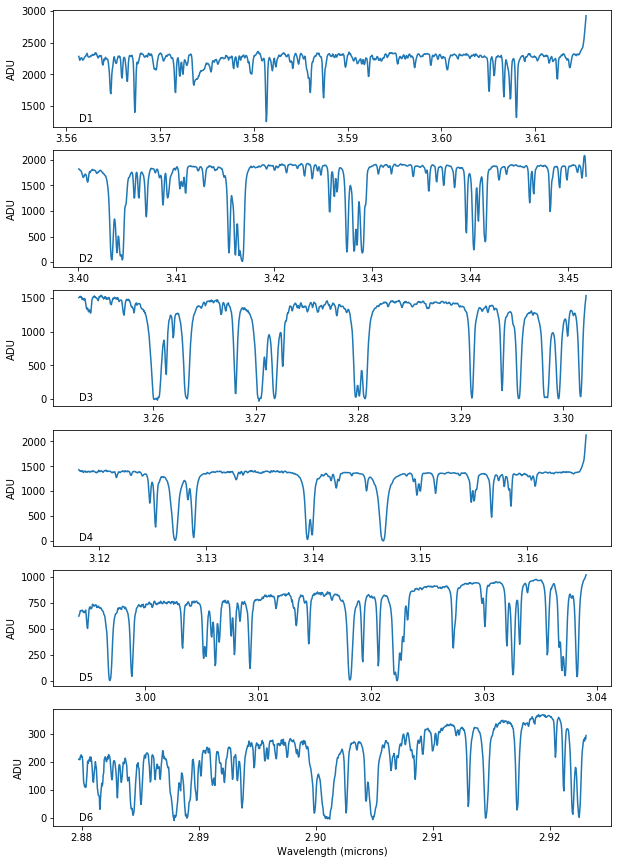

In [3]:
f=plt.figure(figsize=[10,15])
for i, d in enumerate(dirs,1): 
    # read in the ADU->flux conversion value and integration time
    gamma, tint = np.loadtxt(d+'/gamma.txt', skiprows=1)

    # read in the spectral data
    wavenum,flux_no_cont,noise,flux_ADU,model,transmt = np.loadtxt(d+'/spectra00.dat', unpack=True)
    wave=1./wavenum * 10000. # convert wavenumber in 1/cm to wavelength in microns
    
    # convert from ADU to W/m2/cm-1 if desired
    #flux = flux_ADU * gamma / tint

    plt.subplot(len(dirs),1,i)
    plt.plot(wave,flux_ADU)
    plt.ylabel('ADU')
    plt.text(min(wave),min(flux_ADU),d)
    
plt.xlabel('Wavelength (microns)')
plt.show()